<a href="https://colab.research.google.com/github/Jorgemontanez25/Random-Forest-Project-Tutorial/blob/main/Random_Forest_Project_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting Diabetes**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
print(dataframe.shape)
print(dataframe.info())
dataframe.head()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Contamos con un dataset 768 elementos, los cuales cuentan con 9 variables, todas numericas, de la cual la variable dependiente es la variable Outcome. Igual podemos observar al que el dataset no cuenta con datos nulos, revisaremos por datos duplicados.

*Drop duplicades*

In [3]:
dataframe = dataframe.drop_duplicates().reset_index(drop = True)
print(dataframe.shape)
dataframe.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


No se encontraron datos duplicados en el dataset

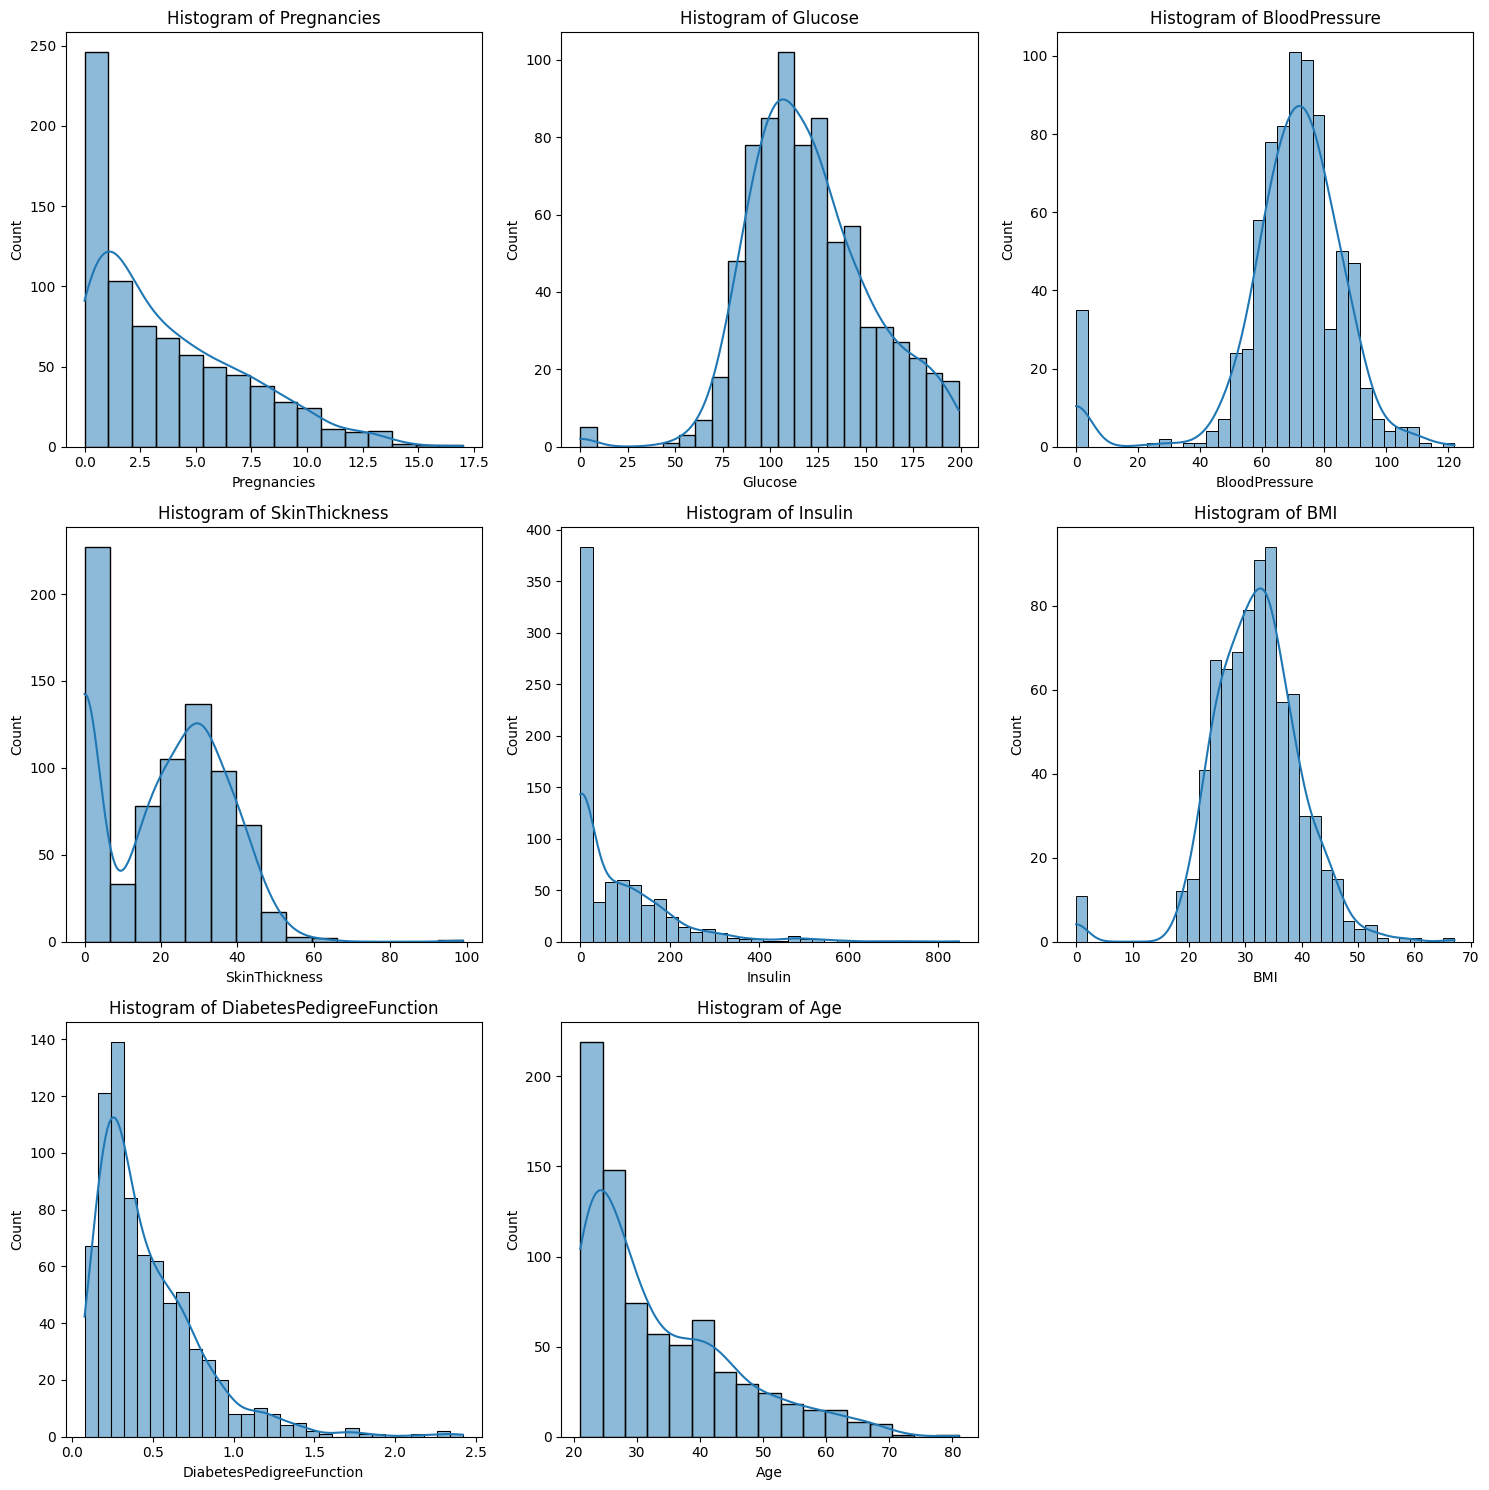

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataframe' is your DataFrame containing the numerical and dependent variables
numerical_vars = dataframe.columns

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical variable
for i, col in enumerate(numerical_vars):
    sns.histplot(data=dataframe, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')

# Remove empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()



In [5]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
from sklearn.preprocessing import MinMaxScaler


# Define numerical variables along with the categorical ones
num_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Scale numerical variables using MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dataframe[num_variables])

# Create a DataFrame with scaled features
dataframe_scal = pd.DataFrame(scaled_features, index=dataframe.index, columns=num_variables)


# Display the first few rows of the scaled DataFrame
dataframe_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


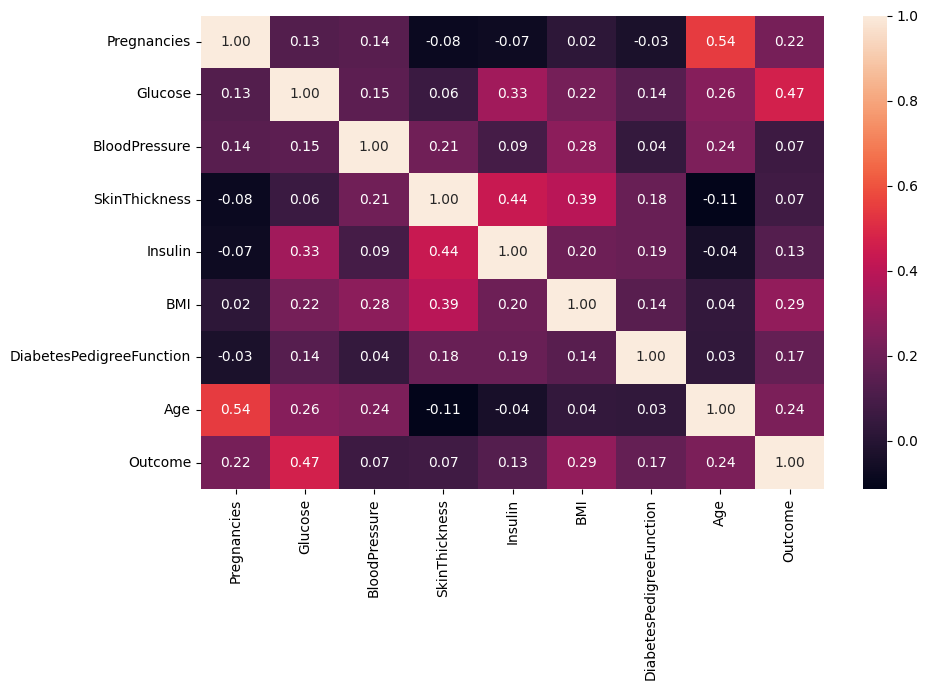

In [7]:
plt.figure(figsize=(10,7))

sns.heatmap(dataframe_scal[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot=True, fmt='.2f')

plt.tight_layout()

plt.show()

Una vez realizada el escalado de los valores numericos, efectuamos el heatmap para evaluar la relacion entre variables, todos presentan una relacion mayor al 5% con la variable depediente, siendo de mayor a menor, con el 47% Glucosa que es mas que logico un nivel de glucosa alto es indice de diabetes, seguido con el 29% BMI igual entendible ya que un nivel alto de BMI podria deducirse a un grado de obesidad y/o resistencia a la insulina lo que podria tener como consecuencia la diabetes, 24% la edad, este valor la podria creer que tiene un peso asi debido que el promedio estadistico de edad para personas con diabetes es entre 45-64 años y al estar dentro de ese rango en conjunto con las demas variables aumenta la probabilidad de poder tener un tipo de diabetes, por si solo hubiera pensado que no tiene relevancia pero en conjunto con otras variables; con el 22% tenemos pregnacies y creo que es un poco logico ya que las embarazadas corren un mayor riesgo de tener diabetes gestacional, es por ello que durante el embarazo una de las pruebas mas importantes es la de diabetes gestacional; 17% DiabetesPedegreeFunction entiendo el porque dela relacion con esta variable, pensaria que podria ser mayor ya que hace referencia al historial clinico familiar del sujeto, y pues al tener padre y abuelo con historial de diabetes entiendo que tendrias mayor probabilidad de contraer la enfermedad; 13% tenemos la insulina que igual es muy razonable que exista la relacion con nuestra variable dependiente, aunque al igual que con el DPF pensaria que podria ser mayor; y ya al final con el 7% tenemos bloodpressure y skinthickness, esto podria pensar que tienen un nivel bajo porque se ve ya como una consecuencia de tener la enfermedad mas que por la causa.

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = dataframe_scal.drop("Outcome", axis = 1)
y = dataframe_scal["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.422111,0.000000,0.000000,0.000000,0.096499,0.000000
1,0.529412,0.562814,0.672131,0.000000,0.420268,0.514091,0.483333
2,0.058824,0.698492,0.377049,0.098109,0.427720,0.245944,0.016667
3,0.000000,0.809045,0.409836,0.000000,0.326379,0.075149,0.733333
4,0.352941,0.673367,0.655738,0.437352,0.688525,0.068318,0.416667


In [9]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.492462,0.475410,0.224586,0.506706,0.150299,0.366667
1,0.117647,0.562814,0.614754,0.000000,0.532042,0.029889,0.000000
2,0.117647,0.542714,0.524590,0.000000,0.459016,0.034159,0.000000
3,0.470588,0.537688,0.655738,0.000000,0.366617,0.332195,0.216667
4,0.411765,0.683417,0.737705,0.000000,0.445604,0.056362,0.483333


In [10]:
# Add target variable 'Heart disease_number' to the selected training features
X_train_sel["Outcome"] = y_train.values

# Add target variable 'Heart disease_number' to the selected testing features
X_test_sel["Outcome"] = y_test.values

# Save the selected training features and target variable to a CSV file
X_train_sel.to_csv("clean_train.csv", index=False)

# Save the selected testing features and target variable to a CSV file
X_test_sel.to_csv("clean_test.csv", index=False)

In [11]:
train_data = pd.read_csv("clean_train.csv")
test_data = pd.read_csv("clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.117647,0.422111,0.000000,0.000000,0.000000,0.096499,0.000000,0.0
1,0.529412,0.562814,0.672131,0.000000,0.420268,0.514091,0.483333,1.0
2,0.058824,0.698492,0.377049,0.098109,0.427720,0.245944,0.016667,0.0
3,0.000000,0.809045,0.409836,0.000000,0.326379,0.075149,0.733333,0.0
4,0.352941,0.673367,0.655738,0.437352,0.688525,0.068318,0.416667,1.0


In [12]:
test_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.492462,0.475410,0.224586,0.506706,0.150299,0.366667,0.0
1,0.117647,0.562814,0.614754,0.000000,0.532042,0.029889,0.000000,0.0
2,0.117647,0.542714,0.524590,0.000000,0.459016,0.034159,0.000000,0.0
3,0.470588,0.537688,0.655738,0.000000,0.366617,0.332195,0.216667,0.0
4,0.411765,0.683417,0.737705,0.000000,0.445604,0.056362,0.483333,0.0


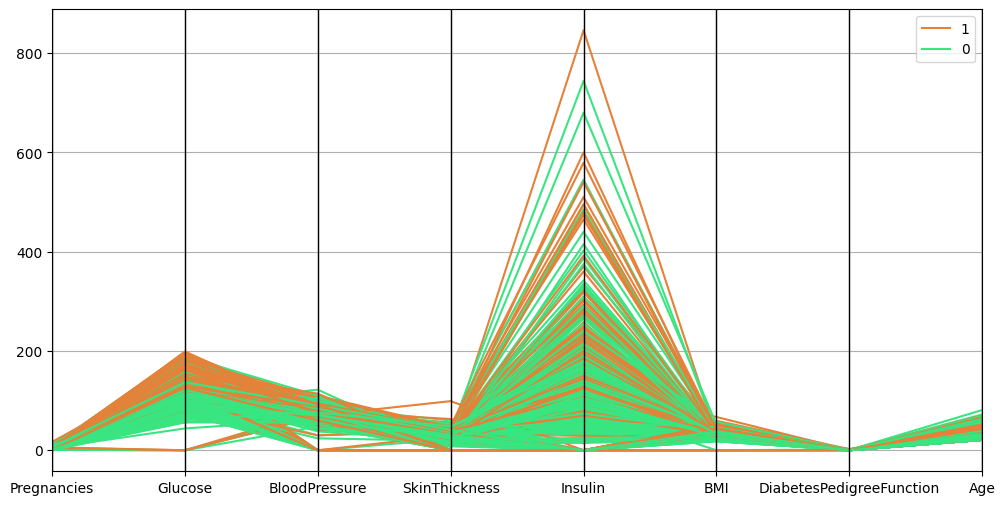

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(dataframe, "Outcome", color = ("#E58139", "#39E581"))

plt.show()

In [14]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

Una vez concuido nuestro EDA, preparamos la informacion separandola con un relacion 80-20 en data de entrenamiento y data de testeo, para poder analalizar la eficiencia de nuestros modelos despues de ser entrenados, empezaramos un un modelo de RandomForest y luego le aplicaremos los modelos grid search y Random search como optimizadores para observar si el modelo presenta alguna mejora en eficiencia.

*Random Forest*

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 60, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=42)

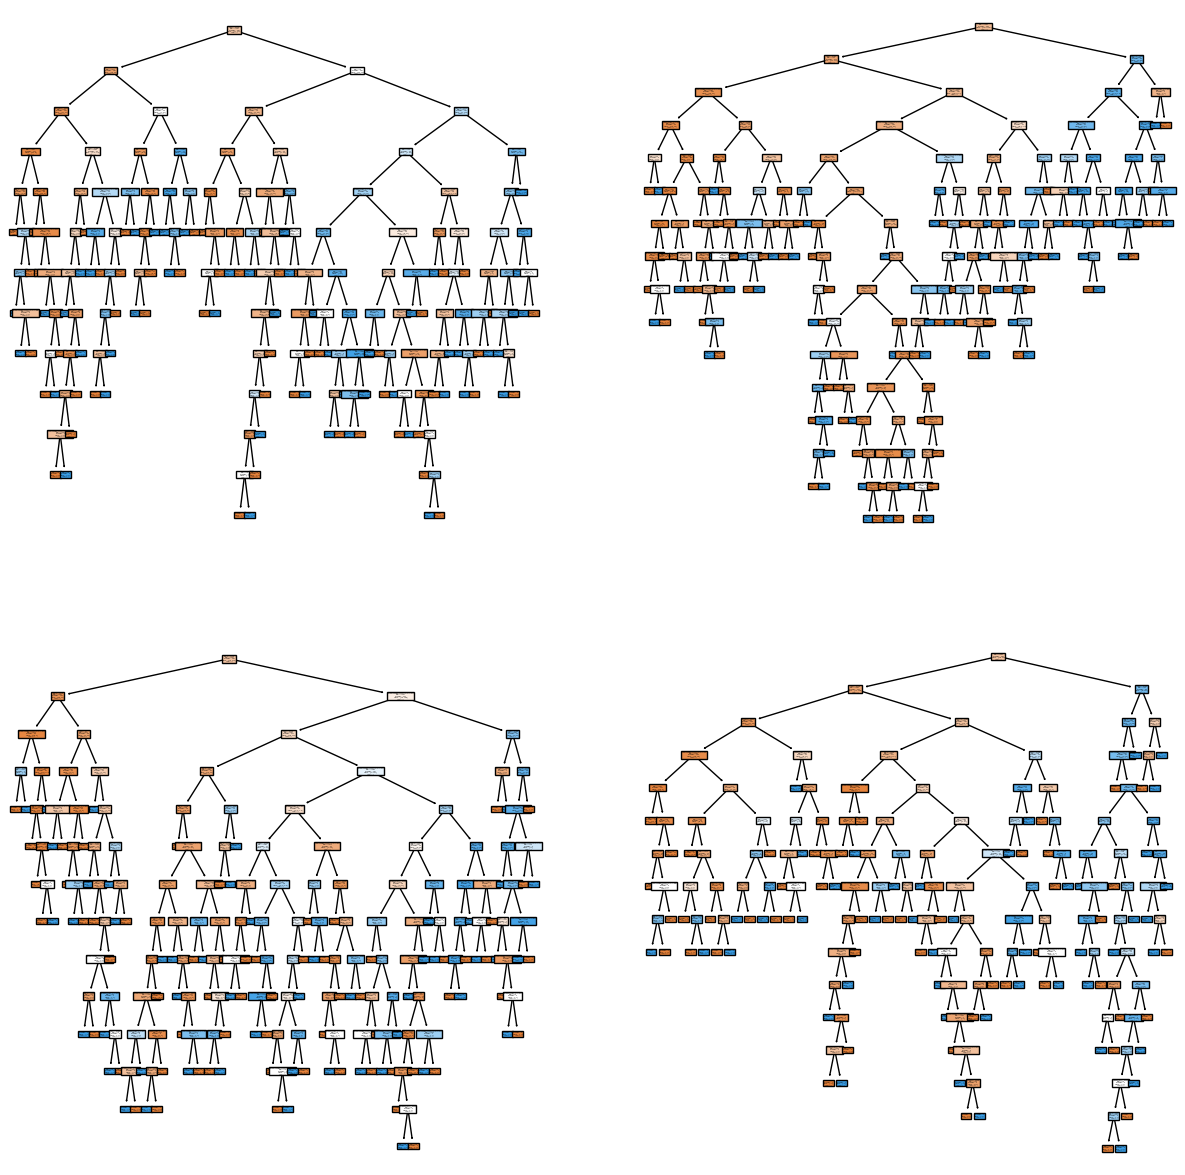

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [17]:
max_depths = [estimator.tree_.max_depth for estimator in model.estimators_]
average_max_depth = sum(max_depths) / len(max_depths)
print("Average max depth of individual trees in the Random Forest:", average_max_depth)

Average max depth of individual trees in the Random Forest: 14.116666666666667


In [18]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0.])

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7727272727272727

*Model Optimization*

In [20]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=60, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [21]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [28]:
model = RandomForestClassifier(criterion = "entropy", max_depth = 20, min_samples_leaf = 2, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       random_state=42)

In [29]:
y_pred = model.predict(X_test)
y_pred

array([1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0.])

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7467532467532467

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters for RandomForestClassifier
hyperparams = {
    "n_estimators": [100, 200, 300, 400, 500],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(model, hyperparams, scoring="accuracy", cv=10, n_iter=10)
random_search.fit(X_train, y_train)

# Get best model and its parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

random_search




RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy')

In [32]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}
Best Score: 0.788127974616605


In [33]:
model = RandomForestClassifier(n_estimators= 300, min_samples_split= 2, min_samples_leaf= 1, max_features= 'log2', max_depth= 20, criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       n_estimators=300)

In [34]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0.])

In [35]:
accuracy_score(y_test, y_pred)

0.7597402597402597

El modelo original de Random Forest nos dio un 77.27% de accuracy con repecto a la decision del modelo de si los pacientes tienen o no tienen diabetes; al aplicar los modelos de optimizacion Grid y Random search a diferencia del resultado obtenido con este mismo dataset en el Desicion Tree problem podemos observar que no lograron optimizar el modelo original ya que ambos optimizadores solo lograron un 74% y 76% accuracy respectivamente.